# Team 5: Universal Basic Income
### Author: Yingjie Ouyang

In this notebook, I will be analyzing various data from WIC Programs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2022 WIC Agencies Report

The report includes information on the different groups that participate in WIC Agency programs.
These groups are split by datasheet and categorized by geography and month.

The report contains multiple sheets, which include:
- Total Participants
- Total Women
- Pregnant women
- Women fully breastfeeding
- Women partially breastfeeding
- Postpartum women
- Total Infants Infants
- Infants fully breastfed
- Infants partially breastfed
- Infants fully formula-fed
- Total Children
- Average food cost per person
- Food costs for the agency
- Rebates received
- Nutrition services & administration costs - Oct 2021 to Sep 2022

**Question**: How many people participate in WIC Agency programs?

For the time being, we will look at the total number of participants.

In [2]:
participants = pd.read_excel("WICAgencies2022.xlsx", sheet_name='Total Number of Participants', header=4).copy()
participants.drop([97, 98, 99], inplace=True) # unnecessary columns at the bottom
participants

,State Agency or Indian Tribal Organization,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,Average Participation
0,Connecticut,45001.0,45387.0,45652.0,46319.0,46350.0,46516.0,45527.0,47152.0,46067.0,46249.0,47145.0,47151.0,4.620967e+04
1,Maine,16645.0,16600.0,16588.0,16713.0,16791.0,17139.0,16995.0,16982.0,16873.0,16840.0,16991.0,16970.0,1.684392e+04
2,Massachusetts,111590.0,112678.0,113269.0,114507.0,114757.0,116697.0,116519.0,117001.0,117058.0,116705.0,117688.0,118613.0,1.155902e+05
3,New Hampshire,13861.0,13941.0,14048.0,13960.0,13859.0,13744.0,12955.0,13528.0,13475.0,13349.0,13546.0,13428.0,1.364117e+04
4,New York,373236.0,374991.0,376895.0,381372.0,382939.0,390891.0,390900.0,393516.0,394128.0,393191.0,396867.0,400052.0,3.874148e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Washington,119580.0,119394.0,119461.0,120958.0,120881.0,122842.0,122081.0,121937.0,122080.0,122258.0,123951.0,124530.0,1.216628e+05
93,Northern Marianas,2949.0,2865.0,2858.0,2802.0,2767.0,2809.0,2803.0,2764.0,2744.0,2745.0,2753.0,2689.0,2.795667e+03
94,"Inter-Tribal Council, NV",613.0,606.0,589.0,564.0,556.0,581.0,616.0,625.0,629.0,630.0,612.0,593.0,6.011667e+02
95,Western Region,1265399.0,1255139.0,1247771.0,1247797.0,1247392.0,1271391.0,1266125.0,1267601.0,1272132.0,1267928.0,1285623.0,1288561.0,1.265238e+06


In [3]:
# participants.rename(columns={"2021-10-01 00:00:00" : "Oct 2021", "2021-11-01 00:00:00 ": "Nov 2021",
#                     "2021-12-01 00:00:00" : "Dec 2021", "2022-01-01 00:00:00" : "Jan 2022",
#                     "2022-02-01 00:00:00" : "Feb 2022", "2022-03-01 00:00:00" : "Mar 2022",
#                     "2022-04-01 00:00:00" : "Apr 2022", "2022-05-01 00:00:00" : "May 2022",
#                     "2022-06-01 00:00:00" : "Jun 2022", "2022-07-01 00:00:00" : "Jul 2022",
#                     "2022-08-01 00:00:00" : "Aug 2022", "2022-09-01 00:00:00" : "Sept 2022"}, inplace=True)
participants.columns = ['State Agency or Indian Tribal Organization', 'Oct 2021', 'Nov 2021', 'Dec 2021',
                       'Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022', 'Jul 2022',
                       'Aug 2022', 'Sep 2022', 'Average Participation']

In [4]:
# turn the index into the region
# might make it easier to index into a specific area, but I'd like to find a better option, if possible
participants.set_index('State Agency or Indian Tribal Organization', inplace=True)

In [5]:
participants.shape

(97, 13)

In [6]:
participants.isnull().sum()

Oct 2021                 0
Nov 2021                 0
Dec 2021                 0
Jan 2022                 0
Feb 2022                 0
Mar 2022                 0
Apr 2022                 0
May 2022                 0
Jun 2022                 0
Jul 2022                 0
Aug 2022                 0
Sep 2022                 0
Average Participation    0
dtype: int64

**Notes**: All values are present in the table; thus we do not need to worry about missing values/nulls.

In [7]:
participants.index

Index(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New York',
       'Rhode Island', 'Vermont', 'Virgin Islands', 'Indian Township, ME',
       'Pleasant Point, ME', 'Northeast Region', 'Delaware',
       'District of Columbia', 'Maryland', 'New Jersey', 'Pennsylvania',
       'Puerto Rico', 'Virginia', 'West Virginia', 'Mid-Atlantic Region',
       'Alabama', 'Florida', 'Georgia', 'Kentucky', 'Mississippi',
       'North Carolina', 'South Carolina', 'Tennessee', 'Choctaw Indians, MS',
       'Eastern Cherokee, NC', 'Southeast Region', 'Illinois', 'Indiana',
       'Iowa', 'Michigan', 'Minnesota', 'Ohio', 'Wisconsin', 'Midwest Region',
       'Arizona', 'Arkansas', 'Louisiana', 'New Mexico', 'Oklahoma', 'Texas',
       'Utah', 'Inter-Tribal Council, AZ', 'Navajo Nation, AZ',
       'Acoma, Canoncito & Laguna, NM', 'Eight Northern Pueblos, NM',
       'Five Sandoval Pueblos, NM', 'Isleta Pueblo, NM',
       'San Felipe Pueblo, NM', 'Santo Domingo Tribe, NM', 'Zuni Pueblo,

In [8]:
participants.iloc[-1]['Average Participation']

6258352.0

From Oct 2021 - Sept 2022, an average of approximately 6 million eligible individuals participated in WIC Agency programs.

In [9]:
regions = [row for row in participants.index if 'Region' in row]
regions

['Northeast Region',
 'Mid-Atlantic Region',
 'Southeast Region',
 'Midwest Region',
 'Southwest Region',
 'Western Region']

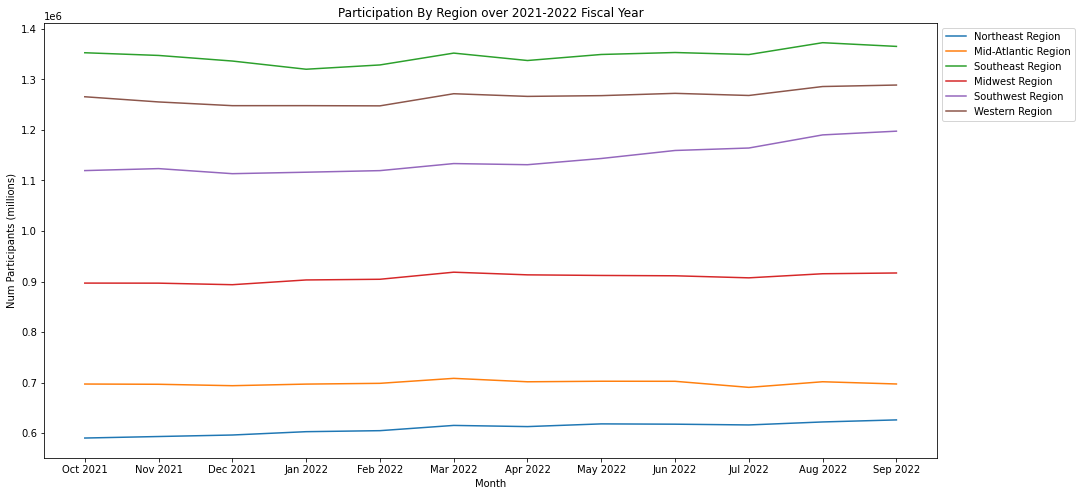

In [10]:
# total participation over the months for each region
# the indexing [:-1] is to omit average participation

plt.figure(figsize=(16, 8))
for i, region in enumerate(regions):
    plt.plot(participants.columns[:-1], participants.loc[region].iloc[:-1], label=region)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Month')
plt.ylabel('Num Participants (millions)')
plt.title('Participation By Region over 2021-2022 Fiscal Year')
plt.show()

**Notes**:
- The Northeast Region has the least number of people participating in WIC programs, at just under 600k
- The Southeast Region has the greatest number of participants at around 1.4 million

Now let's look at the data for the Northeast/Massachusetts area, since that's our area of focus.

In [11]:
participants.loc[:'Northeast Region']

,Oct 2021,Nov 2021,Dec 2021,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Average Participation
State Agency or Indian Tribal Organization,,,,,,,,,,,,,
Connecticut,45001.0,45387.0,45652.0,46319.0,46350.0,46516.0,45527.0,47152.0,46067.0,46249.0,47145.0,47151.0,46209.666667
Maine,16645.0,16600.0,16588.0,16713.0,16791.0,17139.0,16995.0,16982.0,16873.0,16840.0,16991.0,16970.0,16843.916667
Massachusetts,111590.0,112678.0,113269.0,114507.0,114757.0,116697.0,116519.0,117001.0,117058.0,116705.0,117688.0,118613.0,115590.166667
New Hampshire,13861.0,13941.0,14048.0,13960.0,13859.0,13744.0,12955.0,13528.0,13475.0,13349.0,13546.0,13428.0,13641.166667
New York,373236.0,374991.0,376895.0,381372.0,382939.0,390891.0,390900.0,393516.0,394128.0,393191.0,396867.0,400052.0,387414.833333
Rhode Island,16050.0,15880.0,16015.0,16154.0,16431.0,16570.0,16354.0,16395.0,16307.0,16042.0,16032.0,16022.0,16187.666667
Vermont,11139.0,11143.0,11148.0,11223.0,11161.0,11182.0,11200.0,11133.0,11185.0,11226.0,11286.0,11357.0,11198.583333
Virgin Islands,2795.0,2709.0,2692.0,2653.0,2620.0,2563.0,2524.0,2618.0,2618.0,2623.0,2592.0,2587.0,2632.833333
"Indian Township, ME",67.0,47.0,52.0,48.0,44.0,31.0,39.0,40.0,59.0,41.0,42.0,51.0,46.750000


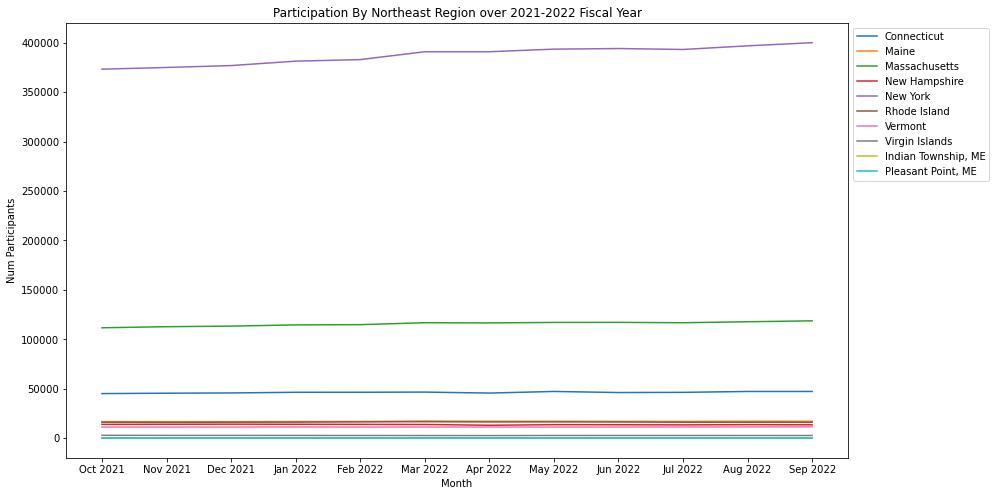

In [12]:
# participation of each area in the Northeast over the months
northeast_regions = participants.index[:10]

plt.figure(figsize=(14, 8))
for i, area in enumerate(northeast_regions):
    plt.plot(participants.columns[:-1], participants.loc[area].iloc[:-1], label=area)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Month')
plt.ylabel('Num Participants')
plt.title('Participation By Northeast Region over 2021-2022 Fiscal Year')
plt.show()

**Notes**:
- New York has the greatest number of participants in WIC programs, numbering at just under 400k, almost 2/3rds of all of the Northeast.
- Massachusetts has has the second greatest number of participants, numbering at just above 100k, about 1/6th of all of the Northeast.
- All other regions have less than 50k participants in WIC programs.

## WIC Enrollment in Boston

This dataset includes figures on the various WIC programs in Boston, their location, categories, and the number of people they serve.

According to the dataset, 25,223 people are **eligible** for support from WIC programs, while 15,054 are **actively enrolled** in WIC programs. The participation rate is 59.7%.

The two main noticeable datasets are Local Program Indicators and Participating Vendors. We will split them into two different dataframes and analyze each.

#### Local Program Indicators

In [13]:
indicators = pd.read_excel('wic-81.xlsx', header=4, usecols="A:E", nrows=36).copy()

In [14]:
indicators.head()

,Year,Community,Program,Category,Percent
0,2018,Boston,Jamaica Plain/Brighton,Actively Receiving WIC,0.596836
1,2018,Boston,Roxbury/South End,Actively Receiving WIC,0.596836
2,2018,Boston,Jamaica Plain/Brighton,Percent Prenatal Maternal Smoking,0.006522
3,2018,Boston,South Cove,Eligible to Receive WIC,NaN
4,2018,Boston,Dorchester North/Mattapan,Percent of Cash Value Benefit (Fruits/Vegetabl...,0.840000


In [15]:
indicators.tail()

,Year,Community,Program,Category,Percent
31,2018,Boston,Roxbury/South End,Percent of Whole Grain Benefits Redeemed,0.661750
32,2018,Boston,East Boston,Percent Prenatal Maternal Smoking,0.010676
33,2018,Boston,East Boston,Eligible to Receive WIC,NaN
34,2018,Boston,Roxbury/South End,Percent Children ages 2-5 with BMI= 95th Perce...,0.155500
35,2018,Boston,Roxbury/South End,Percent Prenatal Maternal Smoking,0.028000


In [16]:
indicators.shape

(36, 5)

All the categories of programs:

In [17]:
indicators['Category'].unique()

array(['Actively Receiving WIC', 'Percent Prenatal Maternal Smoking',
       'Eligible to Receive WIC',
       'Percent of Cash Value Benefit (Fruits/Vegetables) Redeemed',
       'Percent of Whole Grain Benefits Redeemed',
       'Percent Children ages 2-5 with BMI= 95th Percentile for Age'],
      dtype=object)

What and where are the programs with the most percentage of participants?

In [18]:
indicators.sort_values(by='Percent', ascending=False).head(10)

,Year,Community,Program,Category,Percent
20,2018,Boston,South Cove,Percent of Cash Value Benefit (Fruits/Vegetabl...,0.927000
9,2018,Boston,Jamaica Plain/Brighton,Percent of Cash Value Benefit (Fruits/Vegetabl...,0.874000
11,2018,Boston,East Boston,Percent of Cash Value Benefit (Fruits/Vegetabl...,0.868000
4,2018,Boston,Dorchester North/Mattapan,Percent of Cash Value Benefit (Fruits/Vegetabl...,0.840000
27,2018,Boston,Roxbury/South End,Percent of Cash Value Benefit (Fruits/Vegetabl...,0.831000
28,2018,Boston,Dorchester South/South Boston,Percent of Cash Value Benefit (Fruits/Vegetabl...,0.825000
12,2018,Boston,South Cove,Percent of Whole Grain Benefits Redeemed,0.719675
29,2018,Boston,Dorchester North/Mattapan,Percent of Whole Grain Benefits Redeemed,0.670167
6,2018,Boston,Jamaica Plain/Brighton,Percent of Whole Grain Benefits Redeemed,0.668667
31,2018,Boston,Roxbury/South End,Percent of Whole Grain Benefits Redeemed,0.661750


**Notes**:
- In 2018, the program with the highest percentage (at 92.7%) is located in South Cove, with the category being Percent of Cash Value Benefit of Fruits/Vegetables Redeemed
- In fact, the top 6 program indicators have the catagory of Percent Cash Value Benefits (Fruits/Vegetables) Redeemed

It may be useful to look at the information about the percentage of the community eligible to receive WIC vs those actively receiving WIC

In [19]:
indicators[indicators['Category'] == 'Eligible to Receive WIC']

,Year,Community,Program,Category,Percent
3,2018,Boston,South Cove,Eligible to Receive WIC,NaN
7,2018,Boston,Jamaica Plain/Brighton,Eligible to Receive WIC,NaN
14,2018,Boston,Dorchester South/South Boston,Eligible to Receive WIC,NaN
16,2018,Boston,Dorchester North/Mattapan,Eligible to Receive WIC,NaN
23,2018,Boston,Roxbury/South End,Eligible to Receive WIC,NaN
33,2018,Boston,East Boston,Eligible to Receive WIC,NaN


In [20]:
indicators[indicators['Category'] == 'Actively Receiving WIC']

,Year,Community,Program,Category,Percent
0,2018,Boston,Jamaica Plain/Brighton,Actively Receiving WIC,0.596836
1,2018,Boston,Roxbury/South End,Actively Receiving WIC,0.596836
5,2018,Boston,Dorchester North/Mattapan,Actively Receiving WIC,0.596836
13,2018,Boston,South Cove,Actively Receiving WIC,0.596836
25,2018,Boston,Dorchester South/South Boston,Actively Receiving WIC,0.596836
30,2018,Boston,East Boston,Actively Receiving WIC,0.596836


**Notes**:
- There is no data for the percentage of people in individual programs who are eligible to receive WIC
- For those actively receiving WIC, it is the same across all programs at ~59.7%
    - This matches up with 59.7% participation rate across the Boston community
    - Maybe we do not have the data for individual programs

#### Participating Vendors

In [21]:
vendors = pd.read_excel('wic-81.xlsx', header=61, usecols="A:E").copy()

In [22]:
vendors.head()

,Vendor,Street Address,Community,WIC Sales Volume,# of Registers
0,Super Stop & Shop (F&P) #054,375 Centre Street,Abington,"$16,408.91",22
1,Trucchi's Supermarket #4,858 Bedford Street,Abington,"$1,718.15",10
2,Walmart Store (F&P) #2227,777 Brockton Ave,Abington,"$7,991.64",18
3,CVS Pharmacy #706,400 Massachusetts Ave,Acton,$131.96,10
4,Roche Bros. Supermarkets #112,387 Mass. Ave,Acton,$278.52,15


In [23]:
vendors.tail()

,Vendor,Street Address,Community,WIC Sales Volume,# of Registers
841,CVS Pharmacy #4313,438 Route 28,Yarmouth,$154.71,7
842,CVS Pharmacy #944,453 Station Avenue,Yarmouth,$0.00,9
843,Shaw's #3692,1108 State Road,Yarmouth,"$3,962.21",11
844,Stop & Shop #2422,474 Station Ave,Yarmouth,"$4,627.60",16
845,Super Stop & Shop (F&P) #022,55 Long Pond Drive,Yarmouth,"$9,881.82",28


**Note**: Each vendor is dictated by the name of the vendor and a value identifying which store it is in the chain. Let's split that information to gain some useful information on the vendor stores themselves.

In [24]:
vendors['Name'] = vendors['Vendor'].apply((lambda x: x.split('#')[0]))

# some vendors may not have numbers
vendors['Number'] = vendors['Vendor'].apply((lambda x: x.split('#')[1] if len(x.split('#')) > 1 else None))
vendors = vendors.reindex(columns=['Vendor', 'Name', 'Number', 'Street Address', 'Community', 'WIC Sales Volume', '# of Registers'])

In [25]:
vendors.head()

,Vendor,Name,Number,Street Address,Community,WIC Sales Volume,# of Registers
0,Super Stop & Shop (F&P) #054,Super Stop & Shop (F&P),054,375 Centre Street,Abington,"$16,408.91",22
1,Trucchi's Supermarket #4,Trucchi's Supermarket,4,858 Bedford Street,Abington,"$1,718.15",10
2,Walmart Store (F&P) #2227,Walmart Store (F&P),2227,777 Brockton Ave,Abington,"$7,991.64",18
3,CVS Pharmacy #706,CVS Pharmacy,706,400 Massachusetts Ave,Acton,$131.96,10
4,Roche Bros. Supermarkets #112,Roche Bros. Supermarkets,112,387 Mass. Ave,Acton,$278.52,15


In [26]:
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Vendor            846 non-null    object
 1   Name              846 non-null    object
 2   Number            613 non-null    object
 3   Street Address    846 non-null    object
 4   Community         846 non-null    object
 5   WIC Sales Volume  846 non-null    object
 6   # of Registers    846 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 46.4+ KB


**Note**: The type of the 'WIC Sales Volume' column is object, but it would be more useful to us if it was numerical, so let's change that.

In [27]:
vendors['WIC Sales Volume'] = vendors['WIC Sales Volume'].apply(lambda x: float(x[1:].replace(',', '')))

For now, let's just look at the vendors in Boston.

In [28]:
vendors_boston = vendors[vendors['Community'] == 'Boston'].copy()

In [29]:
vendors_boston.head()

,Vendor,Name,Number,Street Address,Community,WIC Sales Volume,# of Registers
56,7-Eleven #37375H,7-Eleven,37375H,14 Maverick Square,Boston,653.17,2
57,Academy Market,Academy Market,None,1588 Columbus Ave,Boston,2534.79,1
58,Aguasvivas Market,Aguasvivas Market,None,926 Morton Street,Boston,2384.32,1
59,America's Food Basket,America's Food Basket,None,217 Bowdoin Street,Boston,16880.17,4
60,America's Food Basket,America's Food Basket,None,500 Geneva Avenue,Boston,39239.48,8


In [30]:
vendors_boston.shape

(105, 7)

Let's take a look at the number of unique vendors which serve the Boston community and plot the top 5 most occurring.

In [31]:
vendors_boston['Name'].nunique()

67

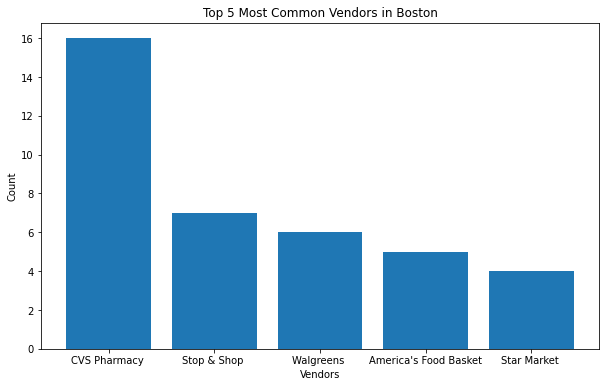

In [32]:
res = vendors_boston.groupby(['Name'])['Name'].count().sort_values(ascending=False).head()
plt.figure(figsize=(10, 6))
plt.bar(res.index, res.values)
plt.xlabel('Vendors')
plt.ylabel('Count')
plt.title('Top 5 Most Common Vendors in Boston')
plt.show()

**Note**: Stop & Shop has two separate names so there might be more Stop & Shop stores

In [33]:
vendors_boston[vendors_boston['Name'].str.contains('Stop & Shop')].shape[0]

9

Let's take a look at the vendors with the most number of registers.

In [34]:
vendors_boston.sort_values(by=['# of Registers'], ascending=False).head(10)

,Vendor,Name,Number,Street Address,Community,WIC Sales Volume,# of Registers
144,Super Stop & Shop (F&P) #429,Super Stop & Shop (F&P),429,1100 Massachusetts Ave,Boston,71753.29,34
128,Star Market #0602,Star Market,0602,53 Huntington Ave,Boston,4394.53,25
139,Stop & Shop #089,Stop & Shop,089,60 Everett Street,Boston,27245.92,23
118,Roche Bros. Supermarket #115,Roche Bros. Supermarket,115,1800 Centre Street,Boston,1598.14,22
137,Stop & Shop #018,Stop & Shop,018,545 Freeport Street,Boston,32167.18,21
141,Stop & Shop #413,Stop & Shop,413,1025 Truman Highway,Boston,13398.11,20
133,Star Market (F&P) #3588,Star Market (F&P),3588,1065 Commonwealth Avenue,Boston,3904.78,19
142,Stop & Shop #459,Stop & Shop,459,460 Blue Hill Ave,Boston,71414.13,18
143,Super Stop & Shop (F&P) #075,Super Stop & Shop (F&P),075,301 Centre Street,Boston,39192.99,17
150,Tropical Foods,Tropical Foods,None,450 Melnea Cass Blvd,Boston,30366.57,16


**Notes**:
- The vendors with the most registers are Stop & Shop (appearing 6 times in the top 10), Star Market (2 times), Roche Bros. and Tropical Foods.

Let's look at vendors by WIC Sales Volume.

In [35]:
vendors_boston.sort_values(by=['WIC Sales Volume'], ascending=False).head(10)

,Vendor,Name,Number,Street Address,Community,WIC Sales Volume,# of Registers
144,Super Stop & Shop (F&P) #429,Super Stop & Shop (F&P),429,1100 Massachusetts Ave,Boston,71753.29,34
142,Stop & Shop #459,Stop & Shop,459,460 Blue Hill Ave,Boston,71414.13,18
136,Stop & Shop #004,Stop & Shop,004,950 American Legion Highway,Boston,46290.69,14
60,America's Food Basket,America's Food Basket,None,500 Geneva Avenue,Boston,39239.48,8
143,Super Stop & Shop (F&P) #075,Super Stop & Shop (F&P),075,301 Centre Street,Boston,39192.99,17
62,America's Food Basket,America's Food Basket,None,926 Cummins Highway,Boston,33801.79,8
137,Stop & Shop #018,Stop & Shop,018,545 Freeport Street,Boston,32167.18,21
61,America's Food Basket,America's Food Basket,None,576 Washington Street,Boston,31965.90,5
63,America's Food Basket,America's Food Basket,None,942 Hyde Park Ave,Boston,31809.32,9
150,Tropical Foods,Tropical Foods,None,450 Melnea Cass Blvd,Boston,30366.57,16


**Notes**:
- The vendor with the highest WIC sales volume are Stop & Shop (5 times), America's Food Basket (4 times), and Tropical Foods.

In [36]:
vendors_boston['# of Registers'].sum()

696

**Notes**: Across the Boston community, the total number of recorded registers across participating vendors is 696.

### Conclusion

- The number of people participating in WIC programs across the regions through the months of 2021-2022 have been relatively stable, with no major fluctuations
- There currently isn't a lot of data for people participating in WIC programs at the district level in Boston
    - Might be a place where we would need more data
    - Especially with regards to how many people are eligible for WIC aid vs. how many people actively participate in WIC programs
- Comparing vendors and their locations with sales and registers may be able to tell us the distribution of people participating in WIC programs in different locations
